In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import*
import math

In [6]:
#Renaming Coloumns for better Understanding
training_data = pd.read_csv('./Documents/training.csv') 
training_data.rename(columns={'T1':'Kitchen_Temp','RH_1':'Kitchen_Hum','T2':'LivingRoom_Temp','RH_2':'LivingRoom_Hum',
                   'T3':'LaundryRoom_Temp','RH_3':'LaundryRoom_Hum','T4':'OfficeRoom_Temp','RH_4':'OfficeRoom_Hum',
                   'T5':'BathRoom_Temp','RH_5':'BathRoom_Hum','T6':'OutsideNorth_Temp','RH_6':'OutsideNorth_Hum',
                   'T7':'IroningRoom_Temp','RH_7':'IroningRoom_Hum','T8':'TeenagerRoom_Temp','RH_8':'TeenagerRoom_Hum',
                   'T9':'ParentRoom_Temp','RH_9':'ParentRoom_Hum','T_out':'Outside_Temp','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)
training_data['Energy_consumed'] = training_data['Appliances'] + training_data['lights']
#Selecting Columns for our model
x_train = training_data[['Kitchen_Temp','Kitchen_Hum','LivingRoom_Temp','LivingRoom_Hum',
                   'LaundryRoom_Temp','LaundryRoom_Hum','OfficeRoom_Temp','OfficeRoom_Hum',
                   'BathRoom_Temp','BathRoom_Hum','OutsideNorth_Temp','OutsideNorth_Hum',
                   'IroningRoom_Temp','IroningRoom_Hum','TeenagerRoom_Temp','TeenagerRoom_Hum',
                   'ParentRoom_Temp','ParentRoom_Hum','Outside_Temp','Pressure',
                   'Humidity','Windspeed','Visibility','Tdewpoint','rv1','NSM']]
y_train = training_data['Energy_consumed']

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 26 columns):
Kitchen_Temp         14803 non-null float64
Kitchen_Hum          14803 non-null float64
LivingRoom_Temp      14803 non-null float64
LivingRoom_Hum       14803 non-null float64
LaundryRoom_Temp     14803 non-null float64
LaundryRoom_Hum      14803 non-null float64
OfficeRoom_Temp      14803 non-null float64
OfficeRoom_Hum       14803 non-null float64
BathRoom_Temp        14803 non-null float64
BathRoom_Hum         14803 non-null float64
OutsideNorth_Temp    14803 non-null float64
OutsideNorth_Hum     14803 non-null float64
IroningRoom_Temp     14803 non-null float64
IroningRoom_Hum      14803 non-null float64
TeenagerRoom_Temp    14803 non-null float64
TeenagerRoom_Hum     14803 non-null float64
ParentRoom_Temp      14803 non-null float64
ParentRoom_Hum       14803 non-null float64
Outside_Temp         14803 non-null float64
Pressure             14803 non-null float64
Humidity   

In [7]:
testing_data = pd.read_csv('./Documents/testing.csv') 
testing_data['Energy_consumed'] =testing_data['Appliances'] + testing_data['lights']
testing_data.rename(columns={'T1':'Kitchen_Temp','RH_1':'Kitchen_Hum','T2':'LivingRoom_Temp','RH_2':'LivingRoom_Hum',
                   'T3':'LaundryRoom_Temp','RH_3':'LaundryRoom_Hum','T4':'OfficeRoom_Temp','RH_4':'OfficeRoom_Hum',
                   'T5':'BathRoom_Temp','RH_5':'BathRoom_Hum','T6':'OutsideNorth_Temp','RH_6':'OutsideNorth_Hum',
                   'T7':'IroningRoom_Temp','RH_7':'IroningRoom_Hum','T8':'TeenagerRoom_Temp','RH_8':'TeenagerRoom_Hum',
                   'T9':'ParentRoom_Temp','RH_9':'ParentRoom_Hum','T_out':'Outside_Temp','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)
x_test = testing_data[['Kitchen_Temp','Kitchen_Hum','LivingRoom_Temp','LivingRoom_Hum',
                   'LaundryRoom_Temp','LaundryRoom_Hum','OfficeRoom_Temp','OfficeRoom_Hum',
                   'BathRoom_Temp','BathRoom_Hum','OutsideNorth_Temp','OutsideNorth_Hum',
                   'IroningRoom_Temp','IroningRoom_Hum','TeenagerRoom_Temp','TeenagerRoom_Hum',
                   'ParentRoom_Temp','ParentRoom_Hum','Outside_Temp','Pressure',
                   'Humidity','Windspeed','Visibility','Tdewpoint','rv1','NSM']]
y_test = testing_data[['Energy_consumed']]

In [31]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 33 columns):
date               4932 non-null object
Appliances         4932 non-null int64
lights             4932 non-null int64
T1                 4932 non-null float64
RH_1               4932 non-null float64
T2                 4932 non-null float64
RH_2               4932 non-null float64
T3                 4932 non-null float64
RH_3               4932 non-null float64
T4                 4932 non-null float64
RH_4               4932 non-null float64
T5                 4932 non-null float64
RH_5               4932 non-null float64
T6                 4932 non-null float64
RH_6               4932 non-null float64
T7                 4932 non-null float64
RH_7               4932 non-null float64
T8                 4932 non-null float64
RH_8               4932 non-null float64
T9                 4932 non-null float64
RH_9               4932 non-null float64
T_out              4932 non-null floa

In [25]:
import math 
def mean_absolute_percentage_error(y_train,y_predicted): 
    y_train, y_predicted = np.array(y_train), np.array(y_predicted)
    return np.mean(np.abs((y_train,y_predicted) / y_train)) * 100

In [14]:
#Implementing Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [15]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_predictedValues = regressor.predict(x_test)
y_predictedValues

array([109.85396258, 105.1846842 , 106.64457095, ..., 146.21316812,
       125.80300663, 117.10142278])

In [17]:
df_y_pred = pd.DataFrame([y_predictedValues]) ##making a dataframe
df_y_pred = df_y_pred.T ##transposing the dataframe
result = pd.concat([y_test, df_y_pred], axis=1) ##joining both the dataframes

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Residual Distribution Plot
y_test_list = y_test.values.tolist()
y_predictedValues_list = y_predictedValues.tolist()

C:\Users\rishi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


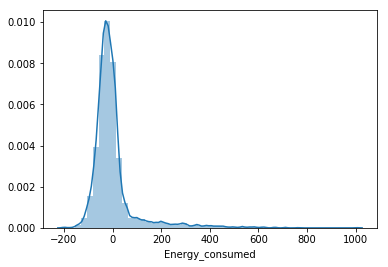

In [20]:
import matplotlib.pyplot as plt
sns.distplot((y_test['Energy_consumed']-y_predictedValues))
plt.show();

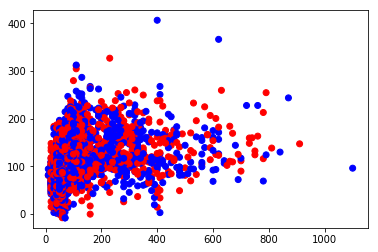

In [21]:
plt.scatter(x=y_test,y=y_predictedValues, c='RB')
plt.show()

In [22]:
regressor.score(x_train,y_train)

0.1643551176515381

In [23]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((len(training_data),1)).astype(int),values = x_train,axis = 1)
x_withBias = X[:,0:32]
regressor_OLS = sm.OLS(endog = y_train,exog = x_withBias).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Energy_consumed   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     111.8
Date:                Sat, 03 Nov 2018   Prob (F-statistic):               0.00
Time:                        17:46:07   Log-Likelihood:                -88520.
No. Observations:               14803   AIC:                         1.771e+05
Df Residuals:                   14776   BIC:                         1.773e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -101.2915    111.524     -0.908      0.364    -319.892     117.309
x1            -3.4078      2.190     -1.556      0.120      -7.701       0.885
x2            15.5414      0.795     19.544      0.000      13.983      17.100
x3           -21.7561      1.924    -11.309      0.000     -25.527     -17.985
x4           -14.8924      0.903    -16.501      0.000     -16.661     -13.123
x5            27.9205      1.242     22.483      0.000      25.486      30.355
x6             5.5878      0.797      7.014      0.000       4.026       7.149
x7             6.8735      1.145      6.004      0.000       4.630       9.117
x8             1.8610      0.752      2.474      0.013       0.386       3.336
x9            -1.8874      1.385     -1.363      0.173      -4.601       0.827
x10            0.1842      0.103      1.787      0.074      -0.018       0.386
x11            8.3881      0.747     11.232      0.000       6.924       9.852
x12            0.4210      0.080      5.281      0.000       0.265       0.577
x13            0.9972      1.550      0.644      0.520      -2.040       4.035
x14           -2.1929      0.507     -4.323      0.000      -3.187      -1.198
x15           10.7466      1.134      9.480      0.000       8.525      12.969
x16           -4.9981      0.459    -10.880      0.000      -5.899      -4.098
x17          -21.0804      2.090    -10.086      0.000     -25.177     -16.984
x18           -0.8939      0.498     -1.794      0.073      -1.870       0.083
x19          -10.6212      1.787     -5.942      0.000     -14.125      -7.118
x20            0.1854      0.126      1.475      0.140      -0.061       0.432
x21           -0.6049      0.371     -1.630      0.103      -1.332       0.122
x22            2.4965      0.408      6.123      0.000       1.697       3.296
x23            0.1595      0.068      2.346      0.019       0.026       0.293
x24            3.7060      1.747      2.121      0.034       0.281       7.131
x25           -0.0468      0.054     -0.860      0.390      -0.153       0.060
x26            0.0004   4.55e-05      9.128      0.000       0.000       0.001
==============================================================================
Omnibus:                    10133.575   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139426.502
Skew:                           3.203   Prob(JB):                         0.00
Kurtosis:                      16.602   Cond. No.                     7.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
""

In [59]:
y_test_list = y_test['Energy_consumed'].values.tolist()


In [63]:
MAE = mean_absolute_percentage_error(y_test_list,y_predictedValues)
print('MAE of Training Data =', MAE)
## Mean squared error
MSE = mean_squared_error(y_test_list,y_predictedValues)
RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',RMSE)
## R-square score of this model
R2 = r2_score(y_test_list,y_predictedValues)
print('R2 of Training Data =',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(y_test_list,y_predictedValues)
print('MAPE of Training Data =',MAPE)


MAE of Training Data = 120.06722710333145
RMSE of Training Data = 95.9351322989174
R2 of Training Data = 0.14117391728015483
MAPE of Training Data = 120.06722710333145


# Random Forest Implementation

In [ ]:
# Implemnting Random Forest 
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(n_estimators=100,random_state=np.random)
randomForest.fit(x_train, y_train)

In [9]:
randomForest.score(x_train, y_train)

0.9428852596412418

In [10]:
randomForest.score(x_test, y_test)

0.575184329204667

In [91]:
randomForest = RandomForestRegressor(n_estimators=200,random_state=np.random)
randomForest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False,
           random_state=<module 'numpy.random' from 'C:\\Users\\rishi\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
           verbose=0, warm_start=False)

In [93]:
randomForest.score(x_train, y_train)

0.9449961364632545

In [92]:
randomForest.score(x_test, y_test)

0.5806276006652878

In [94]:
randomForest = RandomForestRegressor(n_estimators=50,random_state=np.random)
randomForest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False,
           random_state=<module 'numpy.random' from 'C:\\Users\\rishi\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
           verbose=0, warm_start=False)

In [95]:
randomForest.score(x_train, y_train)

0.94163228608233

In [96]:
randomForest.score(x_test, y_test)

0.5769180958703236

In [100]:
randomForest = RandomForestRegressor(n_estimators=2,random_state=np.random)
randomForest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
           oob_score=False,
           random_state=<module 'numpy.random' from 'C:\\Users\\rishi\\Anaconda3\\lib\\site-packages\\numpy\\random\\__init__.py'>,
           verbose=0, warm_start=False)

In [101]:
randomForest.score(x_train, y_train)

0.8141025312060421

In [102]:
randomForest.score(x_test, y_test)

0.33352294985882874

In [103]:
from sklearn.neural_network import MLPRegressor

In [105]:
neuralNetwork = MLPRegressor(hidden_layer_sizes=(15,15,15))

In [106]:
neuralNetwork.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [107]:
neuralNetwork.score(x_train,y_train)

0.04402233178494386

In [108]:
neuralNetwork.score(x_test,y_test)

0.04696098483584521

In [109]:
predicted_values = pred=neuralNetwork.predict(x_test)

In [110]:
predicted_values

array([130.95792649, 132.82744962, 133.77049148, ..., 123.3265329 ,
       130.49828491, 131.34677954])